# Kalman Filter

Plan:
- ...

Case Studies:

- Tracking a Missile in 2D space

## Linear Kalman Filter (LKF)

...

## Tracking a Missile in 2D space

🎯 **Scenario**: Tracking a missile in 2D space

- **State vector**: The missile's position and velocity.
- **Sensors**: Provide noisy measurements of the position.
- **Goal**: Estimate both position and velocity over time.

### 📐 **State Vector**

We define the state as:

$
\mathbf{x}_k =
\begin{bmatrix}
x_k \\
y_k \\
v_{x,k} \\
v_{y,k}
\end{bmatrix}
$

Where:
- $x_k, y_k$: position in 2D
- $v_{x,k}, v_{y,k}$: velocity components




### 🧾 **System Model (Constant Velocity)**

**State Transition**:

Assuming time step $\Delta t$:

$
\mathbf{A} =
\begin{bmatrix}
1 & 0 & \Delta t & 0 \\
0 & 1 & 0 & \Delta t \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$

$\mathbf{x}_k = \mathbf{A} \mathbf{x}_{k-1} + \mathbf{w}_{k-1}$


$\mathbf{w}_{k-1} \sim \mathcal{N}(0, \mathbf{Q})$: Process noise


### 📡 **Measurement Model**

We only measure position (no velocity):

$\mathbf{z}_k =
\begin{bmatrix}
z_{x,k} \\
z_{y,k}
\end{bmatrix}
= \mathbf{H} \mathbf{x}_k + \mathbf{v}_k
\quad\text{where}\quad
\mathbf{H} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}$

$\mathbf{v}_k \sim \mathcal{N}(0, \mathbf{R})$: Measurement noise


### 🔁 **Kalman Filter Steps**

#### **Predict**:

$\hat{\mathbf{x}}_{k|k-1} = \mathbf{A} \hat{\mathbf{x}}_{k-1|k-1}$

$\mathbf{P}_{k|k-1} = \mathbf{A} \mathbf{P}_{k-1|k-1} \mathbf{A}^\top + \mathbf{Q}$


#### **Update**:
- $\mathbf{y}_k = \mathbf{z}_k - \mathbf{H} \hat{\mathbf{x}}_{k|k-1}$
- $\mathbf{S}_k = \mathbf{H} \mathbf{P}_{k|k-1} \mathbf{H}^\top + \mathbf{R}$
- $\mathbf{K}_k = \mathbf{P}_{k|k-1} \mathbf{H}^\top \mathbf{S}_k^{-1}$
- $\hat{\mathbf{x}}_{k|k} = \hat{\mathbf{x}}_{k|k-1} + \mathbf{K}_k \mathbf{y}_k$
- $\mathbf{P}_{k|k} = (\mathbf{I} - \mathbf{K}_k \mathbf{H}) \mathbf{P}_{k|k-1}$

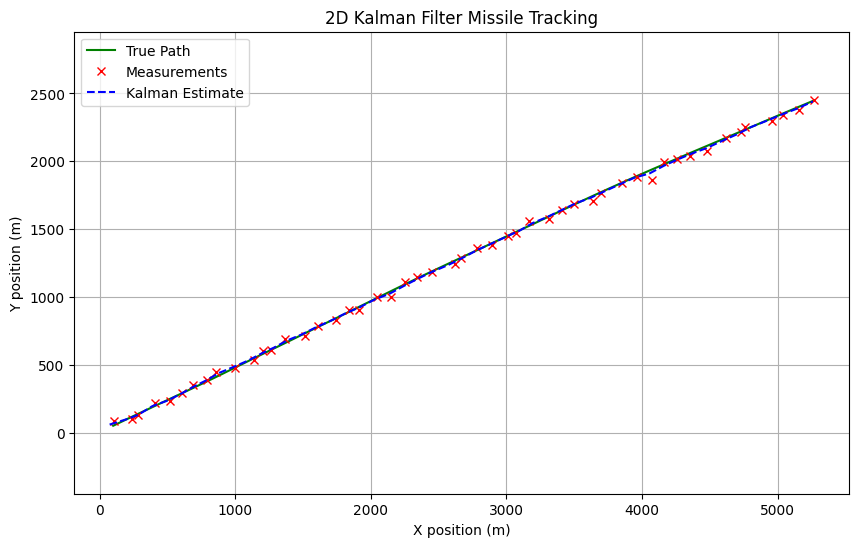

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time step and number of steps
dt = 1.0
num_steps = 50

# Initial true state [x, y, vx, vy]
x_true = np.array([0, 0, 100, 50])

# State transition matrix A
A = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1,  0],
    [0, 0, 0,  1]
])

# Observation matrix H (only position)
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

# Process noise covariance Q
q = 1.0
Q = q * np.array([
    [dt**4/4, 0,       dt**3/2, 0],
    [0,       dt**4/4, 0,       dt**3/2],
    [dt**3/2, 0,       dt**2,   0],
    [0,       dt**3/2, 0,       dt**2]
])

# Measurement noise covariance R
r = 400.0  # std dev = 20m
R = r * np.eye(2)

# Initial estimate and covariance
x_est = np.array([0, 0, 0, 0])
P = np.eye(4) * 500

# For plotting
true_states = []
measurements = []
estimates = []

for _ in range(num_steps):
    # Simulate true motion
    process_noise = np.random.multivariate_normal(np.zeros(4), Q)
    x_true = A @ x_true + process_noise
    true_states.append(x_true.copy())

    # Simulate noisy measurement
    measurement_noise = np.random.multivariate_normal(np.zeros(2), R)
    z = H @ x_true + measurement_noise
    measurements.append(z)

    # ---- Kalman Filter ----

    # Predict
    x_pred = A @ x_est
    P_pred = A @ P @ A.T + Q

    # Update
    y = z - H @ x_pred                       # Innovation
    S = H @ P_pred @ H.T + R                 # Innovation covariance
    K = P_pred @ H.T @ np.linalg.inv(S)      # Kalman gain

    x_est = x_pred + K @ y                   # Updated state estimate
    P = (np.eye(4) - K @ H) @ P_pred         # Updated covariance

    estimates.append(x_est.copy())

# Convert lists to arrays
true_states = np.array(true_states)
measurements = np.array(measurements)
estimates = np.array(estimates)

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(true_states[:, 0], true_states[:, 1], 'g-', label='True Path')
plt.plot(measurements[:, 0], measurements[:, 1], 'rx', label='Measurements')
plt.plot(estimates[:, 0], estimates[:, 1], 'b--', label='Kalman Estimate')
plt.legend()
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.title('2D Kalman Filter Missile Tracking')
plt.grid(True)
plt.axis('equal')
plt.show()


## References

- [State Estimation](https://righteous-guardian-68f.notion.site/State-Estimation-18ec0f5171ec80b997b6c78fc4b3be89?pvs=4)
- [Kalman Filter](https://righteous-guardian-68f.notion.site/Kalman-Filter-16d5cde028354320ba60d35aaa2a4a38?pvs=4)